### References.
- Data set: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
- https://www.kaggle.com/gireeshs/volkswagen-price-regression-r-2-0-9555

In [2]:
!pip install pandas

  Using cached pandas-1.3.4-cp38-cp38-win_amd64.whl (10.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.11.0 requires matplotlib>=2.2, which is not installed.
seaborn 0.11.0 requires scipy>=1.0, which is not installed.
catboost 1.0.0 requires matplotlib, which is not installed.
catboost 1.0.0 requires scipy, which is not installed.
accuinsight 1.0.62 requires matplotlib, which is not installed.
accuinsight 1.0.62 requires numba==0.53.1, which is not installed.
accuinsight 1.0.62 requires scipy, which is not installed.
accuinsight 1.0.62 requires packaging==20.3, but you have packaging 21.0 which is incompatible.


In [3]:
!pip install seaborn

  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lightgbm 3.3.0 requires scikit-learn!=0.22.0, which is not installed.
accuinsight 1.0.62 requires numba==0.53.1, which is not installed.
accuinsight 1.0.62 requires packaging==20.3, but you have packaging 21.0 which is incompatible.


In [4]:
!pip install matplotlib

In [5]:
!pip install numpy

In [7]:
!pip install sklearn

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [9]:
data_vw = pd.read_csv('vw.csv')
data_vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [10]:
data_vw.shape

(15157, 9)

In [11]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [12]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [13]:
data_vw["transmission"].value_counts()

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='count'>

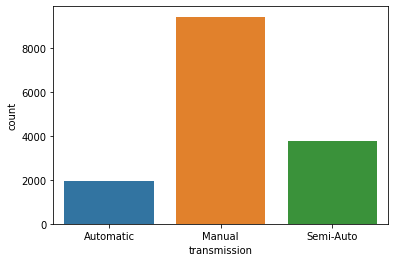

In [14]:
sns.countplot(data_vw["transmission"])

In [15]:
data_vw["fuelType"].value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='fuelType', ylabel='count'>

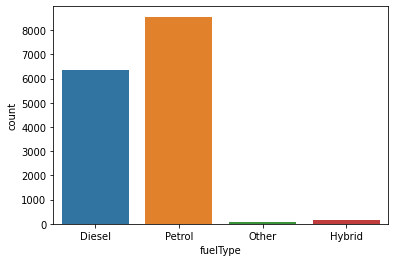

In [16]:
sns.countplot(data_vw['fuelType'])

<AxesSubplot:xlabel='year', ylabel='price'>

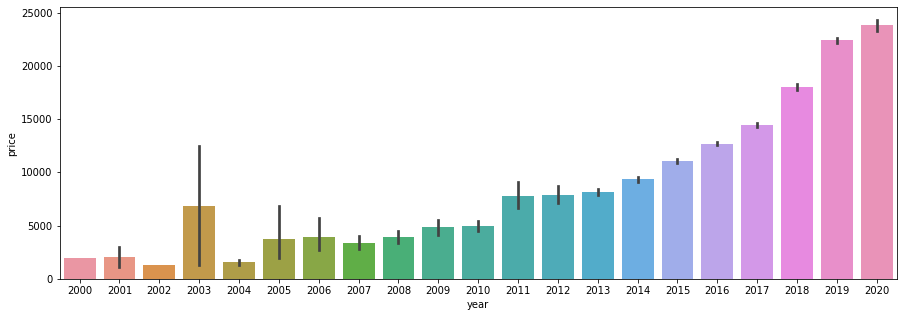

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x=data_vw['year'], y=data_vw['price'])

<AxesSubplot:xlabel='transmission', ylabel='price'>

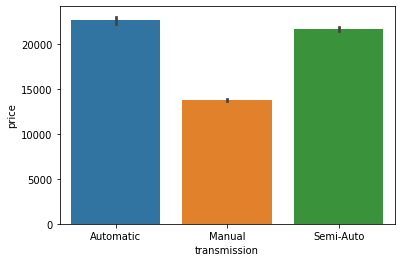

In [18]:
sns.barplot(x=data_vw['transmission'], y=data_vw['price'])

In [19]:
data_vw = pd.get_dummies(data=data_vw, columns = ['model', 'transmission', 'fuelType'])

In [20]:
data_vw.shape

(15157, 40)

In [21]:
data_vw

,year,price,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,25000,13904,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2019,26883,4562,145,49.6,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2019,20000,7414,145,50.4,2.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,2019,33492,4825,145,32.5,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2019,22900,6500,150,39.8,1.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,2012,5990,74000,125,58.9,2.0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
15153,2008,1799,88102,145,46.3,1.2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15154,2009,1590,70000,200,42.0,1.4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15155,2006,1250,82704,150,46.3,1.2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [22]:
X=data_vw.drop('price', axis=1)
y=data_vw['price']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train

,year,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
14363,2019,2000,145,38.7,1.5,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
12986,2017,29000,0,65.7,1.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
12767,2015,19530,0,68.9,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
12929,2013,76000,0,68.9,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6322,2010,168000,125,60.1,2.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,2017,18022,145,55.4,1.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4463,2014,51000,20,67.3,2.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2448,2016,14996,20,60.1,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10769,2016,21155,125,58.9,2.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [25]:
X_test

,year,mileage,tax,mpg,engineSize,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,model_ Caddy,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
2401,2019,3422,150,45.6,1.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13968,2019,6198,150,40.4,1.5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10644,2016,88407,145,53.3,2.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9993,2011,86000,125,51.4,1.2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5850,2017,87749,0,166.0,1.4,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,2016,32688,20,60.1,1.2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11120,2017,48760,160,49.6,2.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
13690,2019,5,145,34.5,3.0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
12610,2017,26203,145,64.2,1.0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [27]:
from sklearn.metrics import make_scorer

def rmsle(predicted_val, actual_val):
    predicted_val = np.array(predicted_val)
    actual_val = np.array(actual_val)
    
    log_predict = np.log(predicted_val+1)
    log_actual = np.log(actual_val+1)
    
    diff = log_predict-log_actual
    diff = np.square(diff)
    
    score = np.sqrt(diff.mean())
    
    return score
    
rmsle_scorer = make_scorer(rmsle)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100,
                             n_jobs=-1,
                             random_state=0)
rfreg.fit(X_train, y_train)
rfpred=rfreg.predict(X_test)
rfpred

In [ ]:
rf_score = rmsle(y_test, rfpred)
rf_score

In [ ]:
rf_score = cross_val_score(rfreg, X_train, y_train, cv=kfold, scoring=rmsle_scorer)
rf_score.mean()

### Gradient Boost

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
gbreg = GradientBoostingRegressor(n_estimators=4000,
                               alpha=0.01)
gbreg.fit(X_train, y_train)
gbpred = gbreg.predict(X_test)
gbpred

array([20471.49484012, 22970.19092271, 11001.18808132, ...,
       43485.61528376,  7407.86269893, 26136.64462986])

In [29]:
gb_score = rmsle(y_test, gbpred)
gb_score

0.09029082970234915

In [31]:
gb_score = cross_val_score(gbreg, X_train, y_train, cv=kfold, scoring=rmsle_scorer)
gb_score

array([0.09757832, 0.10317382, 0.1170051 , 0.08802519, 0.09656775,
       0.10073046, 0.09055945,        nan, 0.0892249 , 0.0894499 ])

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(normalize=True)
lreg.fit(X_train, y_train)


lpred = lreg.predict(X_test)
lpred

In [ ]:
lreg.score(X_train, y_train)

In [ ]:
lreg.score(X_test, y_test)

In [ ]:
score = cross_val_score(lreg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print(f"score: {score}, \n mean: {score.mean()}, \n std: {score.std()}")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

l_train_pred = lreg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, l_train_pred)))
r2 = r2_score(y_train, l_train_pred)
print(f"rmse: {rmse}, r2 score: {r2}")

In [ ]:
l_test_pred = lreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, l_test_pred)))
r2 = r2_score(y_test, l_test_pred)
print(f"rmse: {rmse}, r2 score: {r2}")

In [ ]:
lscore = rmsle(y_test, lpred)
lscore

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridreg = Ridge()
ridreg.fit(X_train, y_train)
ridpred = ridreg.predict(X_test)
ridpred

In [ ]:
ridscore = rmsle(y_test, ridpred)
ridscore